# Roll Number: 2018101075

# Excercise: Eigen Face

Here, we will look into ability of PCA to perform dimensionality reduction on a set of Labeled Faces in the Wild dataset made available from scikit-learn. Our images will be of shape (62, 47). This problem is also famously known as the eigenface problem. Mathematically, we would like to find the principal components (or eigenvectors) of the covariance matrix of the set of face images. These eigenvectors are essentially a set of orthonormal features depicts the amount of variation between face images. When plotted, these eigenvectors are called eigenfaces.

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from sklearn.datasets import fetch_lfw_people

import seaborn as sns; sns.set()

#### Setup data

In [2]:
faces = fetch_lfw_people(min_faces_per_person=8)
X = faces.data
y = faces.target

print(faces.target_names[:5])
print(faces.images.shape)

['Abdullah Gul' 'Adrien Brody' 'Al Gore' 'Alejandro Toledo' 'Ali Naimi']
(4799, 62, 47)


In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
img_shape = faces.images.shape[1:]

Since our images is of the shape (62, 47), we unroll each image into a single row vector of shape (1, 2914). This means that we have 2914 features defining each image. These 2914 features will result into 2914 principal components in the PCA projection space. Therefore, each image location contributes more or less to each principal component.

#### Implement Eigen Faces

In [5]:
def eigen(X):
    """
    returns eigenvalues and eigenvectors sorted by decreasing eigenvalues
    
    Parameters:
    -----------
    
    X has shape mxn where m is no. of samples and n is no. of features
    """
    
    m, n = X.shape
    
    # centering the data
    X_mean = np.mean(X, axis=0, keepdims=True)
    X_input = X - X_mean
    
    # calculating covariance matrix
    cov = 1/m * X_input.T @ X_input
    
    # calculating eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eig(cov)
    
    # sorting acc to decreasing eigenvalues
    idx = eigvals.argsort()[::-1]
    eigvals = np.real(eigvals[idx])
    eigvecs = np.real(eigvecs[:, idx])
    
    return eigvals, eigvecs

In [6]:
eigvals, eigvecs = eigen(X)

In [7]:
def numPrincipalComponents(X, eigvals, threshold=0.95):
    """
    returns no. of principal components required to preserve (threshold*100) % variance
    """
    
    eigvals_cumsum = np.cumsum(eigvals / np.sum(eigvals))
    min_components = np.argmax(eigvals_cumsum >= threshold) + 1
    
    return min_components

In [8]:
def reconstruct(X, eigvecs, num_components):
    """
    returns reconstructed image with num_components principal components
    """
    
    X_reconstructed = X @ eigvecs[:, :num_components] @ eigvecs[:, :num_components].T
    return X_reconstructed

In [9]:
def plot_faces(faces, h=10, v=1):
    fig, axes = plt.subplots(v, h, figsize=(10, 2.5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
      ax.imshow(faces[i].reshape(*img_shape), cmap='gray')

### Q1

How many principal components are required such that 95% of the vari-
ance in the data is preserved?

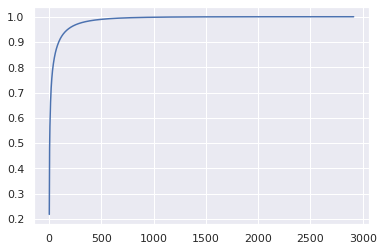

In [10]:
eigvals_cumsum = np.cumsum(eigvals / np.sum(eigvals))
plt.plot(range(1, eigvals.shape[0]+1), eigvals_cumsum)
plt.show()

In [11]:
threshold = 0.95
min_components = numPrincipalComponents(X, eigvals, threshold)
print(f"No. of principal components required to preserve {threshold*100} % variance is: {min_components}.")

No. of principal components required to preserve 95.0 % variance is: 178.


### Q2

Show the reconstruction of the first 10 face images using only 100 principal
components.

In [12]:
no_of_faces = 10
num_components = 100
new_faces = reconstruct(X[:no_of_faces, :], eigvecs, num_components)

original faces


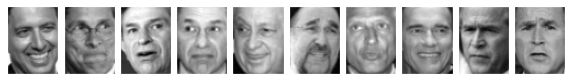

In [13]:
print('original faces')
plot_faces(X[:no_of_faces, :], no_of_faces)

reconstructed faces


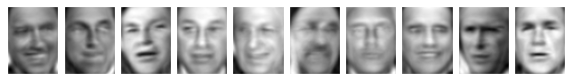

In [14]:
print('reconstructed faces')
plot_faces(new_faces, no_of_faces)

# Adding noise to images

We now add gaussian noise to the images. Will PCA be able to effectively perform dimensionality reduction? 

In [15]:
def plot_noisy_faces(noisy_faces):
    fig, axes = plt.subplots(2, 10, figsize=(10, 2.5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
      ax.imshow(noisy_faces[i].reshape(62, 47), cmap='binary_r')

Below we plot first twenty noisy input face images.

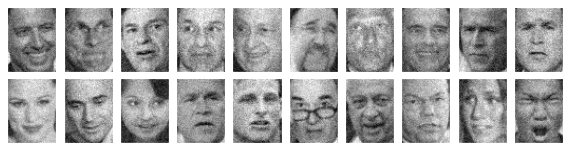

In [16]:
np.random.seed(42)
noisy_faces = np.random.normal(X, 15)
plot_noisy_faces(noisy_faces)

In [17]:
noisy_faces.shape

(4799, 2914)

In [18]:
n_eigvals, n_eigvecs = eigen(noisy_faces)

### Q1

How many principal components are required such that 95% of the vari-
ance in the data is preserved?

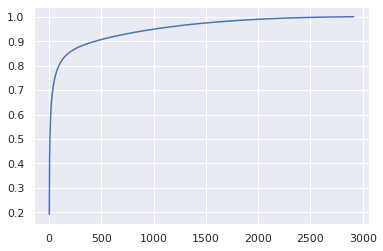

In [19]:
n_eigvals_cumsum = np.cumsum(n_eigvals / np.sum(n_eigvals))
plt.plot(range(1, n_eigvals.shape[0]+1), n_eigvals_cumsum)
plt.show()

In [20]:
n_threshold = 0.95
n_min_components = numPrincipalComponents(noisy_faces, n_eigvals, n_threshold)
print(f"No. of principal components required to preserve {n_threshold*100} % variance is: \n{n_min_components}.")

No. of principal components required to preserve 95.0 % variance is: 
1013.


### Q2

Show the reconstruction of the first 10 face images using only 100 principal
components.

In [21]:
n_no_of_faces = 10
n_num_components = 100
noisy_new_faces = reconstruct(noisy_faces[:n_no_of_faces, :], n_eigvecs, n_num_components)

reconstructed faces


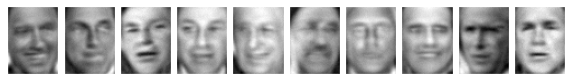

In [22]:
print('reconstructed faces')
plot_faces(noisy_new_faces, n_no_of_faces)